In [1]:
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set(style="whitegrid")

# Cargar las variables de entorno desde el archivo .env
load_dotenv()

# Obtener las credenciales de las variables de entorno
user = os.getenv('POSTGRES_USER')
password = os.getenv('POSTGRES_PASSWORD')
db = os.getenv('POSTGRES_DB')
host = os.getenv('POSTGRES_HOST', 'localhost')

# Crear la cadena de conexión utilizando las variables de entorno
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}/{db}')


In [2]:
# Definir la consulta SQL para obtener los datos limpios
query = text("SELECT * FROM candidates_cleaned")

# Ejecutar la consulta y cargar los datos en un DataFrame de pandas
with engine.connect() as connection:
    df = pd.read_sql(query, connection)

# Mostrar las primeras filas del DataFrame
df.head()


,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3.0,3.0
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2.0,10.0
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10.0,9.0
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7.0,1.0
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9.0,7.0


In [3]:
# Aplicar la lógica de contratación
df['is_hired'] = (df['code_challenge_score'] >= 7) & (df['technical_interview_score'] >= 7)

# Filtrar solo los candidatos contratados
df_hired = df[df['is_hired']]

df_hired.head()


,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score,is_hired
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10.0,9.0,True
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9.0,7.0,True
8,Mose,Lakin,dale_murazik@hotmail.com,2018-03-13,Italy,18,Lead,Social Media Community Management,7.0,10.0,True
13,Hilda,Rodriguez,jordan.hyatt@hotmail.com,2020-05-09,El Salvador,16,Junior,System Administration,7.0,8.0,True
22,Crawford,Ullrich,bruce.koch7@yahoo.com,2021-01-09,Dominica,14,Junior,Game Development,8.0,8.0,True


In [4]:
# Estadísticas descriptivas
df.describe()


,yoe,code_challenge_score,technical_interview_score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


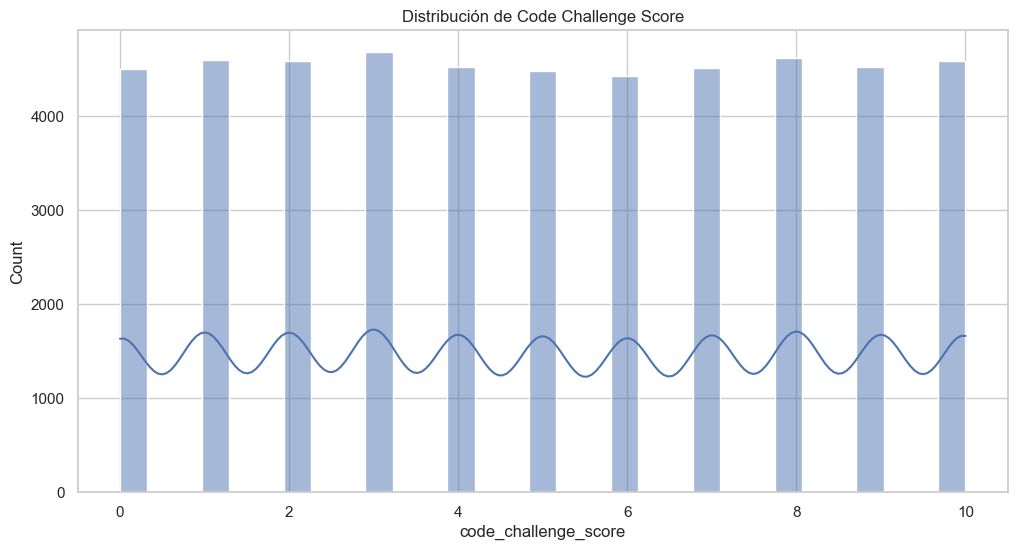

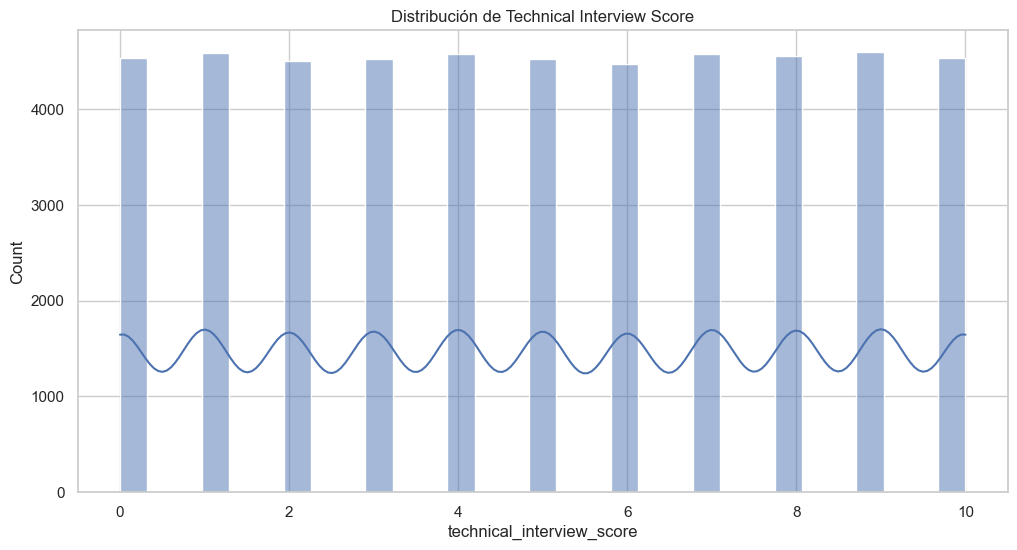

In [7]:
# Distribución de las puntuaciones
plt.figure(figsize=(12, 6))
sns.histplot(df['code_challenge_score'], kde=True)
plt.title('Distribución de Code Challenge Score')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['technical_interview_score'], kde=True)
plt.title('Distribución de Technical Interview Score')
plt.show()


In [11]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[float, int])

# Revisar las primeras filas para asegurarse de que solo contiene datos numéricos
numeric_df.head()


,yoe,code_challenge_score,technical_interview_score,year,month
0,2,3.0,3.0,2021,2
1,10,2.0,10.0,2021,9
2,4,10.0,9.0,2020,4
3,25,7.0,1.0,2020,10
4,13,9.0,7.0,2020,5


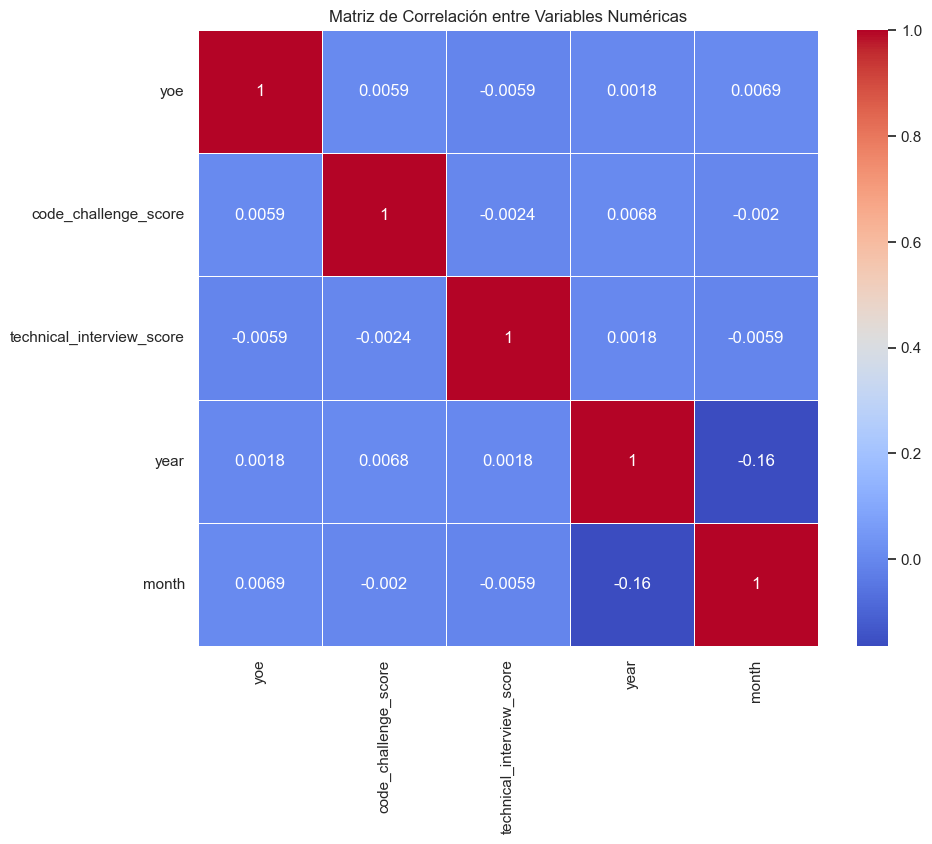

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas relevantes
numeric_columns = df[['yoe', 'code_challenge_score', 'technical_interview_score', 'year', 'month']]

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


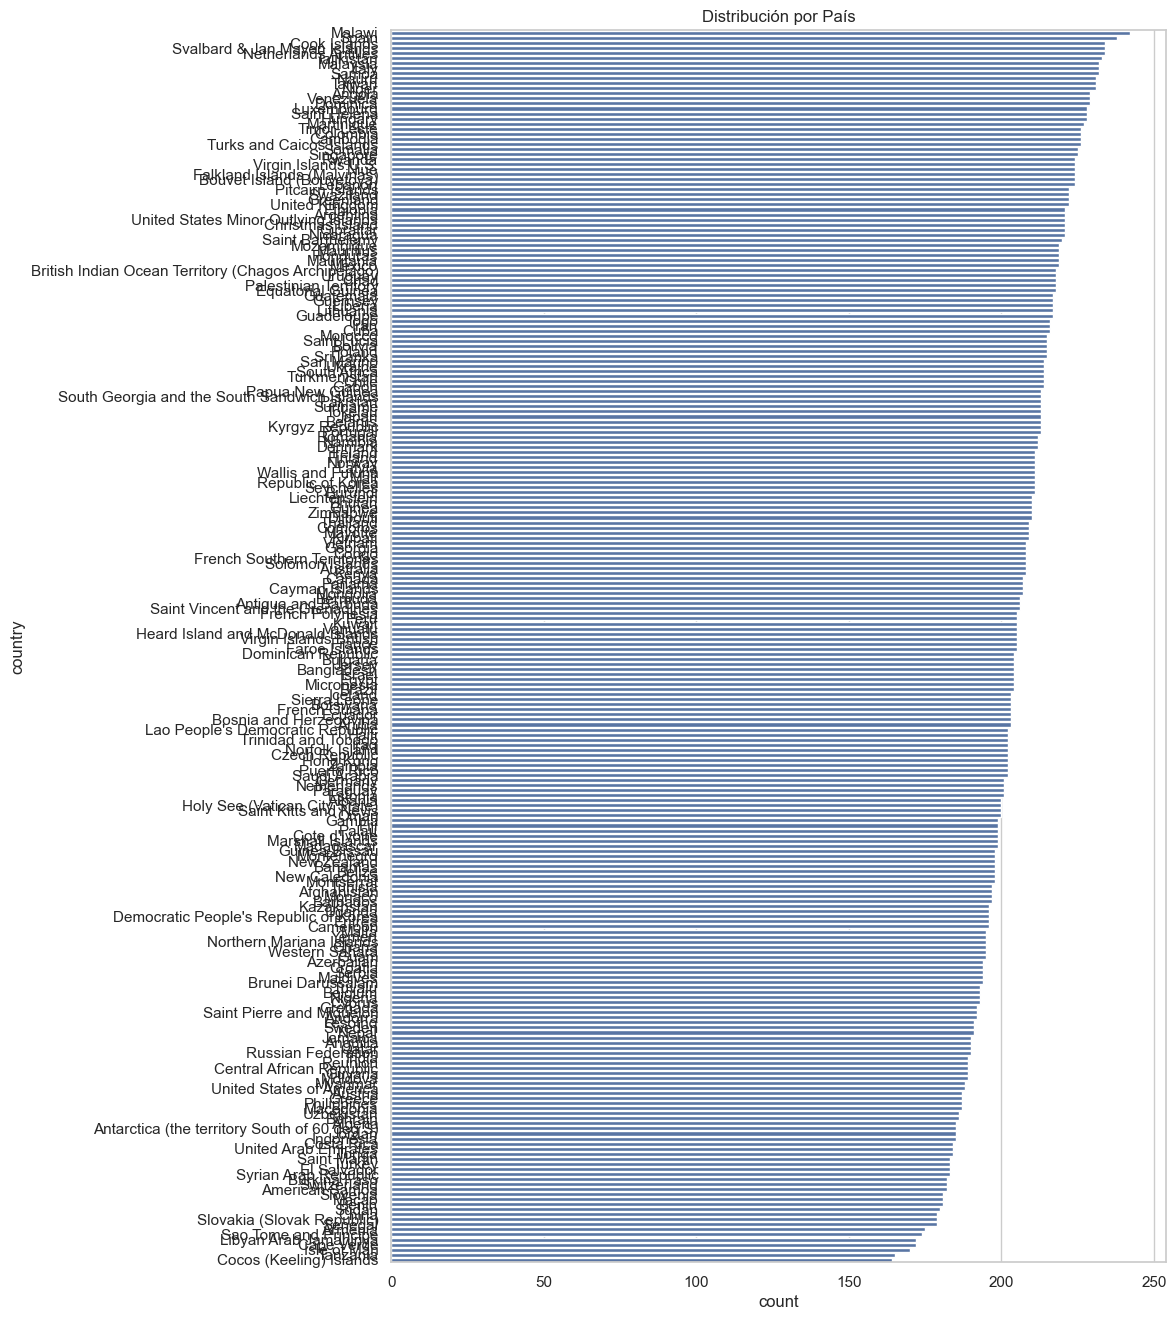

In [15]:
plt.figure(figsize=(10, 16))  # Ajusta el tamaño de la figura para mejor visibilidad
sns.countplot(y='country', data=df, order=df['country'].value_counts().index)
plt.title('Distribución por País')
plt.yticks(rotation=0)  # Mantiene las etiquetas horizontales
plt.show()


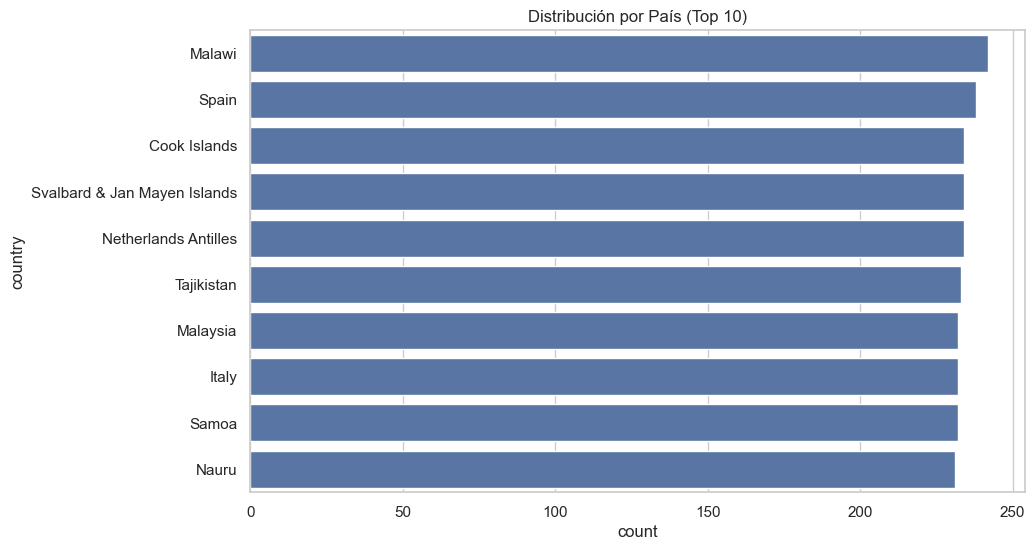

In [14]:
# Mostrar solo los 10 países con más candidatos
top_countries = df['country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=df, order=top_countries.index)
plt.title('Distribución por País (Top 10)')
plt.show()



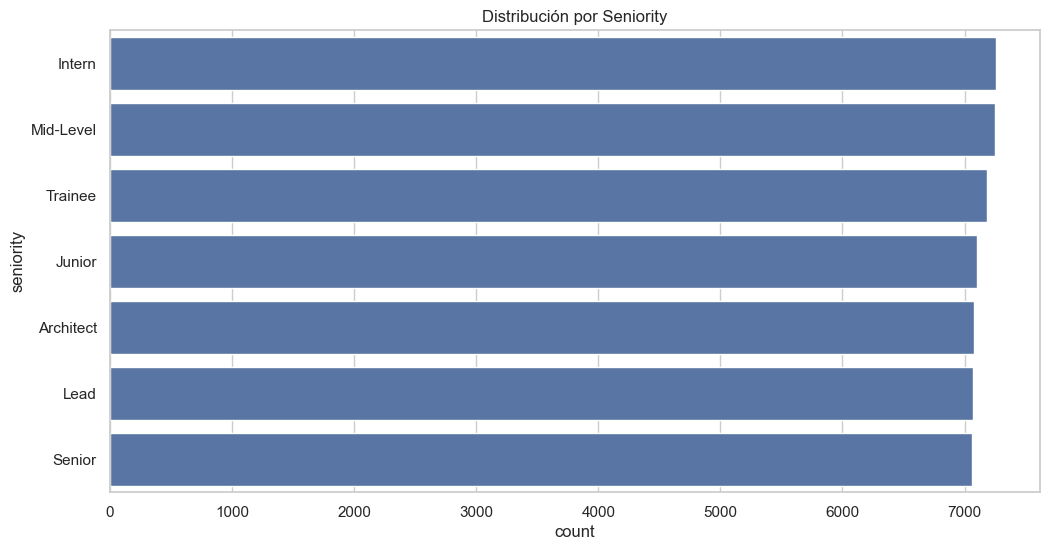

In [18]:
# Distribución por seniority
plt.figure(figsize=(12, 6))
sns.countplot(y='seniority', data=df, order=df['seniority'].value_counts().index)
plt.title('Distribución por Seniority')
plt.show()


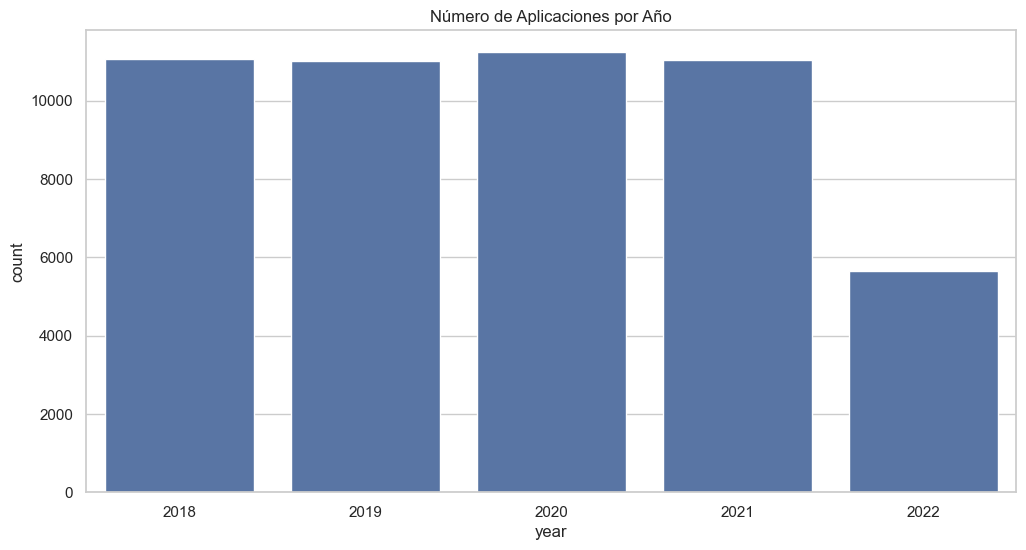

In [19]:
# Número de aplicaciones por año
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df)
plt.title('Número de Aplicaciones por Año')
plt.show()


In [21]:
import os
from dotenv import load_dotenv
import pandas as pd
from sqlalchemy import create_engine, inspect

# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Obtener las credenciales de las variables de entorno
user = os.getenv('POSTGRES_USER')
password = os.getenv('POSTGRES_PASSWORD')
db = os.getenv('POSTGRES_DB')
host = os.getenv('POSTGRES_HOST', 'localhost')

# Crear la cadena de conexión utilizando las variables de entorno
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}/{db}')

# Inspeccionar las columnas de la tabla 'candidates_cleaned'
inspector = inspect(engine)
columns = inspector.get_columns('candidates_cleaned')

# Verificar si la columna 'is_hired' existe
column_names = [col['name'] for col in columns]

if 'is_hired' in column_names:
    print("La columna 'is_hired' existe en la tabla 'candidates_cleaned'.")
else:
    print("La columna 'is_hired' NO existe en la tabla 'candidates_cleaned'.")


La columna 'is_hired' existe en la tabla 'candidates_cleaned'.


In [22]:
import os
from dotenv import load_dotenv
import pandas as pd
from sqlalchemy import create_engine, text

# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Obtener las credenciales de las variables de entorno
user = os.getenv('POSTGRES_USER')
password = os.getenv('POSTGRES_PASSWORD')
db = os.getenv('POSTGRES_DB')
host = os.getenv('POSTGRES_HOST', 'localhost')

# Crear la cadena de conexión utilizando las variables de entorno
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}/{db}')

# Cargar los datos desde la base de datos
with engine.connect() as connection:
    df = pd.read_sql("SELECT * FROM candidates_cleaned", connection)

# Verificar si 'application_date' existe
if 'application_date' in df.columns:
    # Asegurarse de que 'application_date' es de tipo datetime
    df['application_date'] = pd.to_datetime(df['application_date'])

    # Crear la columna 'year' extrayendo el año de 'application_date'
    df['year'] = df['application_date'].dt.year
    
    # Crear la columna 'month' extrayendo el mes de 'application_date'
    df['month'] = df['application_date'].dt.month
    
    # Guardar los datos de nuevo en la base de datos, reemplazando la tabla existente
    df.to_sql('candidates_cleaned', engine, if_exists='replace', index=False)

    print("Las columnas 'year' y 'month' han sido creadas y los datos actualizados en la base de datos.")
else:
    print("La columna 'application_date' no existe en la tabla 'candidates_cleaned'.")


Las columnas 'year' y 'month' han sido creadas y los datos actualizados en la base de datos.
